In [11]:
import pandas as pd
import os
import requests
from io import BytesIO
from PIL import Image
import time

In [2]:
df = pd.read_csv('./OpenData_PotOpenTabletIdntfcC20221021.csv')
df.head(3)

,품목일련번호,품목명,업소일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,의약품제형,색상앞,...,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자,Unnamed: 29
0,200808876,가스디알정50밀리그램(디메크로틴산마그네슘),19540006,일동제약(주),녹색의원형필름코팅정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,IDG,-,원형,연두,...,20080820,당의정,-,-,-,-,-,-,-,NaN
1,200808877,페라트라정2.5밀리그램(레트로졸),19560004,(주)유한양행,어두운황색의원형필름코팅정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,YH,LT,원형,노랑,...,20080820,필름코팅정,-,-,-,-,-,-,-,NaN
2,200808948,졸뎀속붕정(졸피뎀타르타르산염),20080422,보령제약(주),흰색의원형구강붕해정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,-,-,원형,하양,...,20080825,정제,-,-,-,-,-,-,-,NaN


In [3]:
df = df[['품목명', '큰제품이미지', '분류명']]
df.head()

,품목명,큰제품이미지,분류명
0,가스디알정50밀리그램(디메크로틴산마그네슘),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,기타의소화기관용약
1,페라트라정2.5밀리그램(레트로졸),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,항악성종양제
2,졸뎀속붕정(졸피뎀타르타르산염),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,최면진정제
3,가스프렌정(모사프리드시트르산염이수화물),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,기타의소화기관용약
4,바르탄정(발사르탄),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,혈압강하제


In [4]:
classification_names = df['분류명'].unique()
classification_names = list(classification_names)
classification_names

['기타의소화기관용약',
 '항악성종양제',
 '최면진정제',
 '혈압강하제',
 '동맥경화용제',
 '해열.진통.소염제',
 '정신신경용제',
 '기타의중추신경용약',
 '기타의비뇨생식기관및항문용약',
 '치과구강용약',
 '기타의순환계용약',
 '간장질환용제',
 '혼합비타민제(비타민AD혼합제제를제외)',
 '진해거담제',
 '소화성궤양용제',
 '칼슘제',
 '기타의비타민제',
 '기타의화학요법제',
 '무기질제제',
 '기타의자양강장변질제',
 '하제|완장제',
 '골격근이완제',
 '따로분류되지않는대사성의약품',
 '진경제',
 '항전간제',
 '제산제',
 '주로그람양성|음성균에작용하는것',
 '주로그람양성균|리케치아|비루스에작용하는것',
 '비타민C및P제',
 '단백아미노산제제',
 '항히스타민제',
 '구충제',
 '당뇨병용제',
 '혈관확장제',
 '기타의외피용약',
 '정장제',
 '비타민E및K제',
 '기타의알레르기용약',
 '자격요법제(비특이성면역억제제를포함)',
 '난포호르몬제및황체호르몬제',
 '효소제제',
 '기타의호흡기관용약',
 '안과용제',
 '합성마약',
 '통풍치료제',
 '종합대사성제제',
 '따로분류되지않고치료를주목적으로하지않는의약품',
 '부정맥용제',
 '비타민B제(비타민B1을제외)',
 '기타의혈액및체액용약',
 '비타민B1제',
 '건위소화제',
 '자율신경제',
 '아편알카로이드계제제',
 '혈액응고저지제',
 '진훈제',
 '피임제',
 '항원충제',
 '기타의조제용약',
 '최토제|진토제',
 '뇌하수체호르몬제',
 '각성제|흥분제',
 '해독제',
 '비타민A및D제',
 '기타의조직세포의기능용의약품',
 '기타의항생물질제제(복합항생물질제제를포함)',
 '부신호르몬제',
 '이비과용제',
 '강심제',
 '화농성질환용제',
 '모발용제(발모|탈모|염모|양모제)',
 '주로그람양성|음성균|리케치아|비루스에작용하는것',
 '지혈제',
 '항결핵제',
 '주로항산성균에작용하는것',
 '이담제',
 '비뇨생식기관용제

In [5]:
for classification_name in classification_names:
    os.makedirs(f'./과제1/{classification_name}',exist_ok=True)

OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못되었습니다: './과제1/하제|완장제'

In [ ]:
df['분류명'][df['분류명'] == '하제|완장제']

52       하제|완장제
133      하제|완장제
171      하제|완장제
250      하제|완장제
254      하제|완장제
          ...  
23866    하제|완장제
24044    하제|완장제
24192    하제|완장제
24346    하제|완장제
24600    하제|완장제
Name: 분류명, Length: 145, dtype: object

In [6]:
df['분류명'][df['분류명'] == '하제|완장제'] = '하제or완장제'

In [7]:
df['분류명'][df['분류명'] == '하제|완장제']

Series([], Name: 분류명, dtype: object)

In [8]:
classification_names = df['분류명'].unique()
classification_names = list(classification_names)

In [9]:
for classification_name in classification_names:
    if '|' in classification_name:
        classification_name = classification_name.replace('|','or')
    os.makedirs(f'./과제1/{classification_name}',exist_ok=True)

In [10]:
df['큰제품이미지'][0]

'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300104'

In [31]:
# img1 = cv2.imread(df['큰제품이미지'][0])
# # img1 = cv2.imread(df['큰제품이미지'][0], 1)
# # img1 = cv2.imread(df['큰제품이미지'][0], cv2.IMREAD_COLOR)

# print(type(img1))

# cv2.imshow('image1', img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<class 'NoneType'>


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

0.48148179054260254


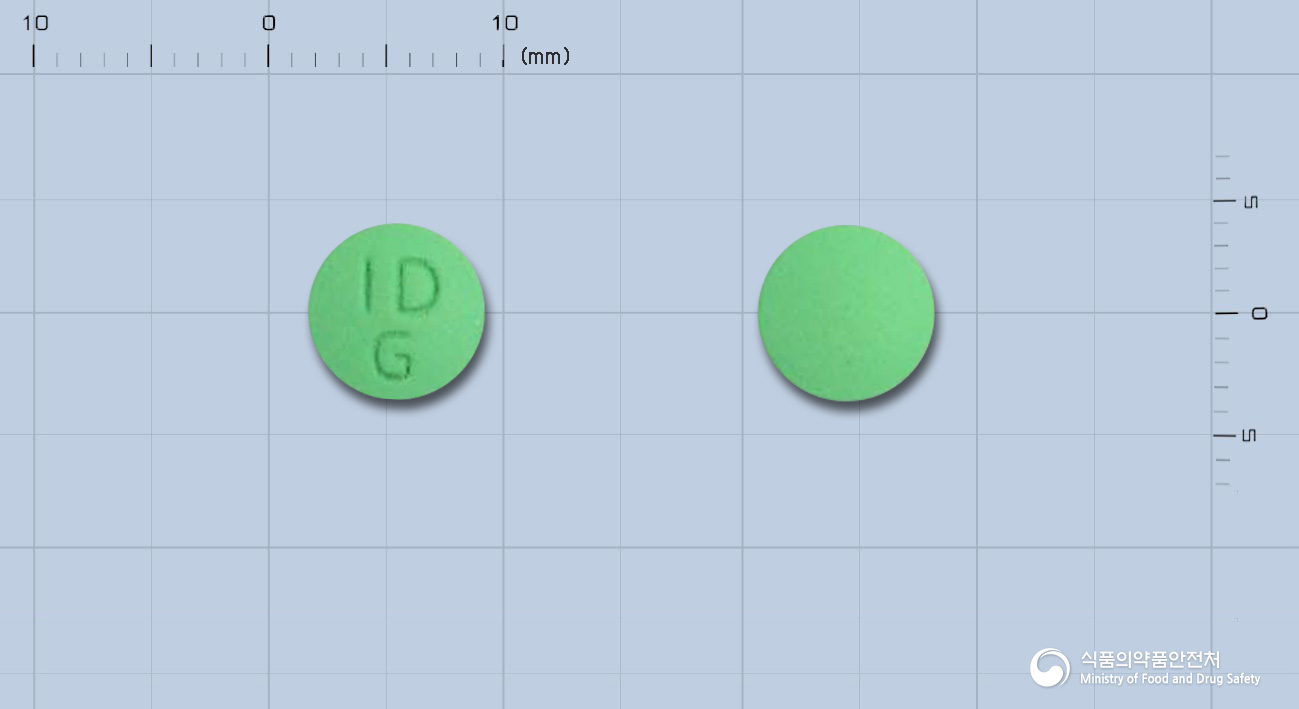

In [13]:
# 다운받을 이미지 url
url = df['큰제품이미지'][0]

# time check
start = time.time()

# request.get 요청
res = requests.get(url)

# 이미지 다운로드 시간 체크
print(time.time() - start)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

In [16]:
df.head()

,품목명,큰제품이미지,분류명
0,가스디알정50밀리그램(디메크로틴산마그네슘),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,기타의소화기관용약
1,페라트라정2.5밀리그램(레트로졸),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,항악성종양제
2,졸뎀속붕정(졸피뎀타르타르산염),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,최면진정제
3,가스프렌정(모사프리드시트르산염이수화물),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,기타의소화기관용약
4,바르탄정(발사르탄),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,혈압강하제


In [17]:
df.describe()

,품목명,큰제품이미지,분류명
count,24694,24694,24694
unique,24644,24694,105
top,레날리드정(레날리도마이드),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,혈압강하제
freq,7,1,2724


In [18]:
# 품목명 열을 기준으로 중복 여부만 확인하기
dup = df.duplicated(['품목명'])

# 여기서 dup의 데이터타입은 Series
dup

0        False
1        False
2        False
3        False
4        False
         ...  
24689    False
24690    False
24691    False
24692    False
24693    False
Length: 24694, dtype: bool

In [25]:
df[dup]

,품목명,큰제품이미지,분류명
424,로나센정2밀리그램(블로난세린)/로나센정4밀리그램(블로난세린),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,정신신경용제
1928,라믹탈정25밀리그램|50밀리그램|100밀리그램(라모트리진),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,항전간제
1929,라믹탈정25밀리그램|50밀리그램|100밀리그램(라모트리진),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,항전간제
7532,부스론정5밀리그램|10밀리그램(부스피론염산염),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,정신신경용제
7760,핀테정(에포니디핀염산염),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,혈관확장제
7892,치옥타시드에이취알정200|600밀리그램(티옥트산),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,따로분류되지않는대사성의약품
7895,티에스원캡슐20|25,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,항악성종양제
15232,듀오레캡슐,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,정장제
15934,리스펜오디정2밀리그램(리스페리돈),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,정신신경용제
15935,리스펜오디정1밀리그램(리스페리돈),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,정신신경용제


In [29]:
df[dup]['큰제품이미지'][1928]

'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/1Mxwka5v1kH'

In [30]:
df[dup]['큰제품이미지'][1929]

'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/1Mxwka5v1jh'

In [31]:
df[dup]['큰제품이미지'][424]

'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/1MrmYmlR4pA'

In [32]:
list(df['큰제품이미지'].values)

['https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300104',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300107',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300128',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300143',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300155',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300161',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/153432591328100009',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/154333330132500103',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300198',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/1OCNrLiTjPI',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/1NXa2J_Kd2y',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/152648520364900061',
 'https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426407360700016',
 'https://nedrug.mfds.go.kr/pbp/cmn/ite

In [108]:
img_bigs = list(df['큰제품이미지'].values)

for i,img_big in enumerate(img_bigs):
    # display(df.loc[i,:])
    name = df['품목명'][i]
    class_name = df['분류명'][i]
    print(name, class_name, img_big)

    # request.get 요청
    res = requests.get(img_big)
    print(res)

    #Img open
    request_get_img = Image.open(BytesIO(res.content))
    print(type(request_get_img))

    path = f'./과제1/{class_name}/{name}.jpg'
    request_get_img.save(path)

가스디알정50밀리그램(디메크로틴산마그네슘) 기타의소화기관용약 https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300104
<Response [200]>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
페라트라정2.5밀리그램(레트로졸) 항악성종양제 https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300107
<Response [200]>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
졸뎀속붕정(졸피뎀타르타르산염) 최면진정제 https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300128
<Response [200]>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
가스프렌정(모사프리드시트르산염이수화물) 기타의소화기관용약 https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300143
<Response [200]>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
바르탄정(발사르탄) 혈압강하제 https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300155
<Response [200]>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
리피논정80밀리그램(아토르바스타틴칼슘삼수화물) 동맥경화용제 https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300161
<Response [200]>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
사르발탄정160밀리그램(발사르탄) 혈압강하제 https://nedrug.mfd

KeyboardInterrupt: 

In [105]:
tmp = []
for i in df['품목명']:
    if '/' in i:
        # print(i.replace('/','_'))
        tmp.append(i.replace('/','_'))
    if '|' in i:
        tmp.append(i.replace('|','_'))
    if ':' in i:
        tmp.append(i.replace(':','_'))
    if ':' in i:
        tmp.append(i.replace('<','_'))
    if ':' in i:
        tmp.append(i.replace('>','_'))
    else:
        tmp.append(i)

In [106]:
df['품목명'] = tmp

In [107]:
tmp = []
for i in df['품목명']:
    if '/' in i:
        print(i.replace('/','_'))
    if '|' in i:
        print(i.replace('|','_'))
    if ':' in i:
        print(i.replace(':','_'))

In [79]:
df.head()

,품목명,큰제품이미지,분류명
0,가스디알정50밀리그램(디메크로틴산마그네슘),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,기타의소화기관용약
1,페라트라정2.5밀리그램(레트로졸),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,항악성종양제
2,졸뎀속붕정(졸피뎀타르타르산염),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,최면진정제
3,가스프렌정(모사프리드시트르산염이수화물),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,기타의소화기관용약
4,바르탄정(발사르탄),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,혈압강하제


In [81]:
tmp = []
for i in df['분류명']:
    if '|' in i:
        # print(i.replace('|','or'))
        tmp.append(i.replace('|','or'))
    else:
        tmp.append(i)

In [84]:
tmp = []
for i in df['분류명']:
    if '|' in i:
        print(i.replace('|','or'))

In [82]:
df['분류명'] = tmp

In [85]:
len(df)

24694

In [ ]:
import os
import shutil

def folderCreate(folder, field):
    # 폴더 이름에 들어가면 안되는 것들
    stopFolderName = '\ / : * ? " < > |'

    for x in stopFolderName.split(' '):
        field = field.str.replace(x, '_')
    
    if folder in os.listdir('./'):
        print('기존폴더를 삭제합니다.')
        shutil.rmtree(folder)
    
    os.mkdir(folder)

    for x in field.unique():
        os.mkdir(folder + '/' + x)

folderCreate('테스트', df['분류명'])